In [1]:
import numpy as np
import pandas as pd
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [2]:
def make_matrices(coord,total_CA):
    nframes = int(len(coord)/total_CA)
    #print(nframes)
    dm = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    dm1 = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    dm_sum = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    dm_avg = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    for_std = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    sum_for_std = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    std = np.zeros(shape=(total_CA,total_CA), dtype=np.float64)
    
    
    for frame in range(0,nframes,1):
        for i in range(0,total_CA,1):
            CAi = total_CA*frame + i
            for j in range(0,total_CA,1):
                CAj = total_CA*frame + j
                dm[i,j] = np.sqrt((coord[0].loc[CAi]-coord[0].loc[CAj])**2 + (coord[1].loc[CAi]-coord[1].loc[CAj])**2 + (coord[2].loc[CAi]-coord[2].loc[CAj])**2)   
                #dm = np.round(dm,2)
        dm_sum = dm_sum + dm
    
    dm_avg = dm_sum / nframes
    #dm_avg = np.round(dm_avg,2)
    
    for frame in range(0,nframes,1):
        for i in range(0,total_CA,1):
            CAi = total_CA*frame + i
            for j in range(0,total_CA,1):
                CAj = total_CA*frame + j
                dm1[i,j] = np.sqrt((coord[0].loc[CAi]-coord[0].loc[CAj])**2 + (coord[1].loc[CAi]-coord[1].loc[CAj])**2 + (coord[2].loc[CAi]-coord[2].loc[CAj])**2)   
                #dm1= np.round(dm1,2)
                for_std[i,j] = (dm1[i,j]-dm_avg[i,j])**2
        
        #for_std = (dm1-dm_avg)**2
        
        
        sum_for_std = sum_for_std + for_std
        #sum_for_std = np.round(sum_for_std,2)
    #print (sum_for_std,"\n#####")
    std = np.sqrt(sum_for_std/nframes)
    
    return dm_avg, std

In [3]:
import time
start_time = time.time()


total_CA = 64
block_frames=100
block=total_CA*block_frames
#total_fr=24000
total_fr=100
system='wt'

coord = pd.read_csv(f"./md1us_all_no200ns_{system}_disp_CA_fit_dt100.txt",sep='\s+',header=None)
dm_all = np.zeros(shape=(1,total_CA,total_CA))
std_all = np.zeros(shape=(1,total_CA,total_CA))


for i in range(0,total_fr,block_frames):
    #print(total_CA*i,total_CA*i+block)
    df_new = coord.iloc[total_CA*i:total_CA*i+block].reset_index(drop=True)
    #print(df_new)
    
    dm_avg, std = make_matrices(df_new,total_CA)
    
    dm_all = np.concatenate((dm_all, [dm_avg]))
    std_all = np.concatenate((std_all, [std]))
    
    print(i," frames")
    
std_all = std_all[1:]
dm_all = dm_all[1:]


#std_all
print("--- %s seconds ---" % (time.time() - start_time))


0  frames
--- 49.08725190162659 seconds ---


In [4]:
with open(f'{system}_disp_CA_dt100_200fr_1bl_dm.npy', 'wb') as f:
    np.save(f, dm_all)
with open(f'{system}_disp_CA_dt100_200fr_1bl_std.npy', 'wb') as f:
    np.save(f, std_all)

In [5]:
with open(f'{system}_disp_CA_dt100_200fr_1bl_dm.npy', 'rb') as f:
    a = np.load(f)
with open(f'{system}_disp_CA_dt100_200fr_1bl_std.npy', 'rb') as f:
    b = np.load(f)

In [6]:
a[0][:][:]

array([[ 0.        ,  3.84105369,  6.70118097, ..., 12.15908119,
        10.9744803 , 14.20735591],
       [ 3.84105369,  0.        ,  3.86928491, ...,  9.02310828,
         8.82012629, 12.45695308],
       [ 6.70118097,  3.86928491,  0.        , ...,  5.71565635,
         5.51696851,  9.02224507],
       ...,
       [12.15908119,  9.02310828,  5.71565635, ...,  0.        ,
         3.8677616 ,  6.40975813],
       [10.9744803 ,  8.82012629,  5.51696851, ...,  3.8677616 ,
         0.        ,  3.85845896],
       [14.20735591, 12.45695308,  9.02224507, ...,  6.40975813,
         3.85845896,  0.        ]])

In [ ]:
b[0][:][:]

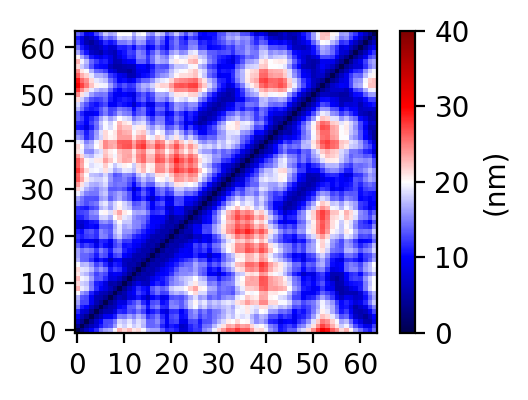

In [7]:
fig, ax = plt.subplots(ncols=1,figsize=(3,2),dpi=200)

dm_show = ax.matshow(a[0], cmap=plt.cm.seismic,origin='lower',vmin = 0,vmax = 40)
plt.gca().xaxis.tick_bottom()

plt.colorbar(dm_show,label="(nm)");

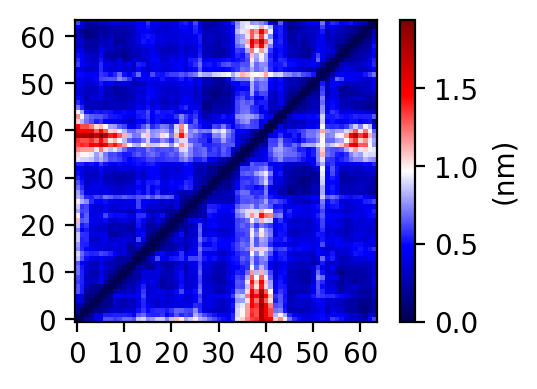

In [8]:
fig, ax = plt.subplots(ncols=1,figsize=(3,2),dpi=200)

dm_show = ax.matshow(b[0], cmap=plt.cm.seismic,origin='lower')#,vmin = 0,vmax = 1)
plt.gca().xaxis.tick_bottom()

plt.colorbar(dm_show,label="(nm)");